# Classification Churn Costumer
Mini Project by Group 1

# Use Case

* **Use Case Summary**


* **Objective Statement** :

    * Get business insight about how many customer who churn or not churn
    * Get business insight about how many female and male in churn or not churn customer
    * Get business insight about how many customer who has a partner, has dependent or not, and old age or not
    * Get business insight about how many customer used service facilities like : PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and Papperless Billing
    * Get business insight about how long customer used service (Contract)
    * Get business insight about how payment method from customer
    * Build models using machine learning to predict customer churn
    
    
* **Challanges** :
    * Large size of data, can not maintain by excel spreadsheet
    * Fill in the missing value in the dataset
    * Change the data type of column which doesn't match
    * Hard to know the meaning of each column



* **Methodology / Analytic Technique** :
    * Descriptive analysis
        * Describe the information such as, min/max value of each column, average, and the total count of data contained in each column. We also describe the distribution of the numerical data.
    * Graph analysis
        * Elaborate the relation of each plot/graphic including the data percentage and assumption/hypothesis of its implication.
    * Using Machine Learning Classification
        * Logistic regression, AUC ROC, and Hyper tuning


* **Business Benefit**:

    * Gain insight to keep customers from churn through modification of benefits/features provided to these customers
    * Gain insight to improve the quality of company services so that customers remain loyal and gain more profit for the company
    * Build models using machine learning to predict customer churn


* **Expected Outcome**:

    * Know how many customer who churn or not churn
    * Know how many female and male in churn or not churn customer
    * Know how many customer who has a partner, the customer has dependent or not, and old age or not
    * Know about frequently used facilities
    * Know How about Among 'tenure', 'monthly Charge', 'Contract', 'Phone Service', 'gender', and others, which variable has the most influence on whether or not a customer churns churn
    * Know how to build models using machine learning to predict customer churn

# Business Understanding
* Data telco is a company engaged in telecommunication and internet services. 
- This case has some business question using the data:
    * How many customer who churn or not churn?
    * How many female and male in churn or not churn customer?
    * How many customer who has a partner, the customer has dependent or not, and old age or not?
    * How about frequently used facilities?
    * How about Among tenure', 'monthly Charge', 'Contract', 'Phone Service', 'gender', and others, which variable has the most influence on whether or not a customer churns churn?
    * How to build models using machine learning to predict customer churn?

# Data Preparation

* **Code use**:
    * Python 3.9.7
    * Package: Pandas, Numpy, Matplotlib, Seaborn, Sklearn, Warning and Feature Engine


# Data Understanding


* **Source Data**:
    * The dataset used is data from https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
    * The raw data contains 7043 rows (customers) and 21 columns (features).


* **Data Dictionary** :
    * customerID : Customer ID
    * gender : Whether the customer is a male or a female (Male, Female)
    * SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
    * Partner : Whether the customer has a partner or not (Yes, No)
    * Dependents : Whether the customer has dependents or not (Yes, No)
    * Tenure : Number of months the customer has stayed with the company
    * PhoneService : Whether the customer has a phone service or not (Yes, No)
    * MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
    * InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
    * OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
    * OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
    * DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
    * TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
    * StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
    * Contract : Indicates the customer’s current contract type: (Month-to-Month, One Year, Two Year)
    * Paperless Billing: Indicates if the customer has chosen paperless billing: (Yes, No)
    * Payment Method: Indicates how the customer pays their bill: (Bank Withdrawal, Credit Card, Mailed Check)
    * Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
    * Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
    * Churn Label: 
        * Yes = the customer left the company
        * No = the customer remained with the company


In [1]:
# pip install imblearn -U

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, log_loss
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data_telco.csv")
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,NaN,NaN,NaN,NaN,12,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,NaN,NaN,NaN,NaN,71,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,NaN,NaN,NaN,NaN,5,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,NaN,NaN,NaN,NaN,52,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Two year,No,Bank transfer (automatic),21.00,1107.2,No


# Data Profiling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

# Data Cleansing

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

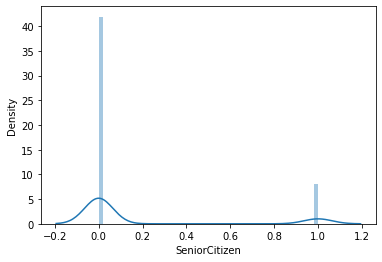

In [8]:
sns.distplot(df["SeniorCitizen"])
#berarti kategori

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].fillna('unknown')
df['gender'] = df['gender'].fillna('unknown')
df['Partner'] = df['Partner'].fillna('unknown')
df['Dependents'] = df['Dependents'].fillna('unknown')
df['MultipleLines'] = df['MultipleLines'].fillna('unknown')
df['InternetService'] = df['InternetService'].fillna('unknown')
df['OnlineSecurity'] = df['OnlineSecurity'].fillna('unknown')
df['OnlineBackup'] = df['OnlineBackup'].fillna('unknown')
df['DeviceProtection'] = df['DeviceProtection'].fillna('unknown')
df['TechSupport'] = df['TechSupport'].fillna('unknown')
df['StreamingTV'] = df['StreamingTV'].fillna('unknown')
df['StreamingMovies'] = df['StreamingMovies'].fillna('unknown')

In [10]:
np.sum(df.isna())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# EDA

In [13]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


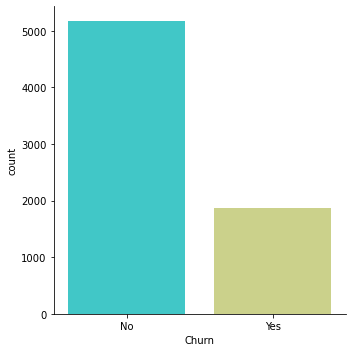

In [14]:
#Bar Chart
sns.catplot(x="Churn",kind="count",palette="rainbow",data=df)

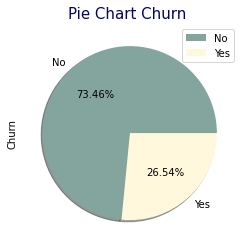

In [15]:
#Pie Chart
colors = ('#84a59d', '#FFF8DC', '#b08968')
Type=df['Churn'].value_counts()
Type.plot.pie(autopct='%.2f%%',shadow=True, colors=colors,legend=True)
plt.title('Pie Chart Churn ', fontsize=15, color="#03045e")

plt.show()

Bar Chart diatas menunjukkan jumlah pelanggan yang tidak meninggalkan/berhenti berlayanan telco ( No churn) lebih banyak dari pada pelanggan yang meninggalkan/berhenti berlayanan telco (Yes churn). Begitu pula pada pie chart diatas terlihat bahwa pelanggan yang tidak Churn sebesar 73,46 % dan pelanggan yang Churn sebesar 26,54 %. Hal ini mungkin saja bisa terjadi karena perusahaan bmemberikan diskon atau potongan harga kepada pelanggan, sehingga masih banyak pelanggan yang tidak meninggalkan/berhenti berlangganan.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

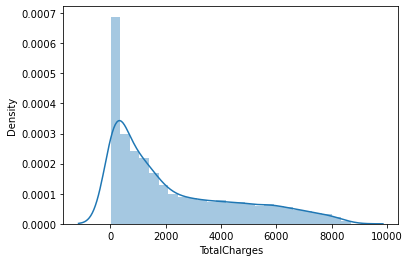

In [16]:
sns.distplot(df["TotalCharges"])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

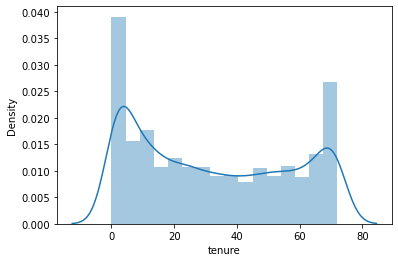

In [17]:
sns.distplot(df["tenure"])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

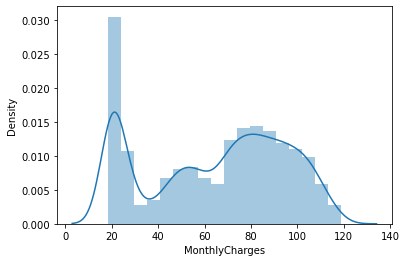

In [18]:
sns.distplot(df["MonthlyCharges"])

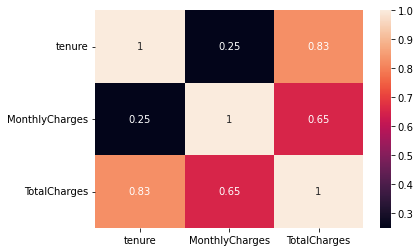

In [19]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(),annot=True);

Berdasarkan korelasi plot diatas, dapat dilihat nilai korelasi antara Tenure dengan Total Charges tinggi yaitu sebesar 0,83 dan korelasi antara Monthly Charges dengan Total Charges cukup tinggi sebesar 0,65. Hal ini dapat menunjukkan adanya multikolinearitas antara Tenure dengan Total Charges dan Monthly Charges dengan Total Charges. Sehingga perlu dilakukan eliminasi variabel pada salah satu variabel tersebut. Disini variabel yang dipilih untuk dihapus adalah variabel Total Charges.

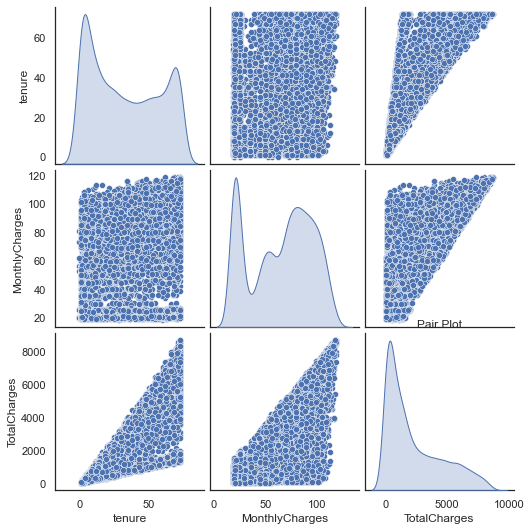

In [20]:
#Pair Plot
sns.set(style='white')
sns.pairplot(df,palette="cubehelix",diag_kind = 'kde')
plt.title('Pair Plot')
plt.show()

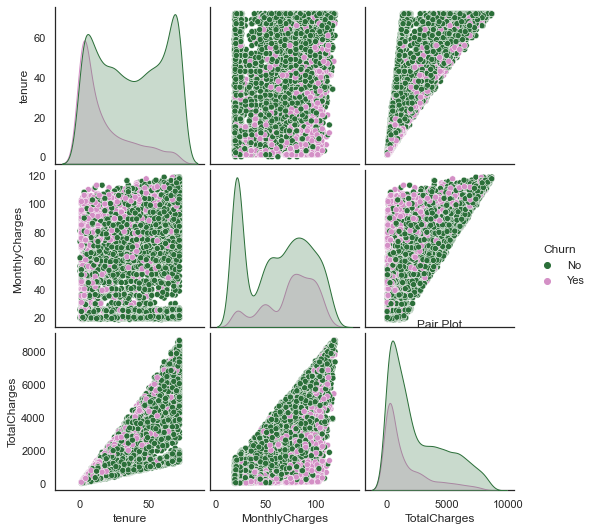

In [21]:
#Pair Plot
sns.set(style='white')
sns.pairplot(df, hue='Churn',palette="cubehelix")
plt.title('Pair Plot')
plt.show()

Dari pair plot diatas, dapat dilihat bahwa distribusi dari Monthly Charges, Total Charges, dan Tenure tidak ada yang normal. Untuk distribusi, Tenure dan Monthly Charges cenderung bimodal karena memiliki 2 puncak. dan untuk Total Charges distribusinya skew ke kanan sehingga persebaran datanya banyak di kiri (diantara rentang 0-5000). Dan jika distibusinya dibagi berdasarkan kategori Churn, tetap terlihat bahwa data tidak berdistribusi normal.

## Churn Vs Gender

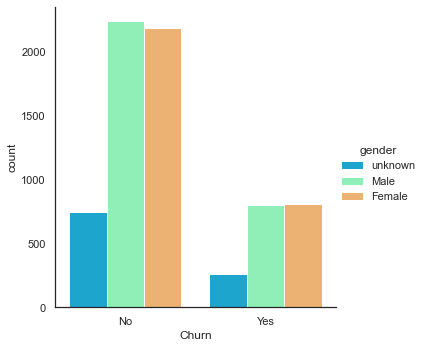

In [22]:
sns.catplot(x="Churn",kind="count",hue="gender",palette="rainbow",data=df)

In [23]:
pd.crosstab(df['Churn'], df['gender'])

gender,Female,Male,unknown
Churn,,,
No,2187,2239,748
Yes,806,802,261


In [24]:
# Churn No
Female = 2187
Male = 2239
Unknown = 748
Churn = Female + Male + Unknown
F_Churn = Female / Churn * 100
M_Churn = Male / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn No vs gender")

print(f"dari total {Churn} pelanggan, persentase female sebesar {F_Churn}")
print(f"dari total {Churn} pelanggan, persentase male sebesar {M_Churn}")
print(f"dari total {Churn} pelanggan, persentase unknows sebesar {U_Churn}")
total = F_Churn + M_Churn + U_Churn
print(total)

di Churn No vs gender
dari total 5174 pelanggan, persentase female sebesar 42.26903749516815
dari total 5174 pelanggan, persentase male sebesar 43.274062620796286
dari total 5174 pelanggan, persentase unknows sebesar 14.456899884035563
100.0


In [25]:
# Churn Yes
Female = 806
Male = 802
Unknown = 261
Churn = Female + Male + Unknown
F_Churn = Female / Churn * 100
M_Churn = Male / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn Yes vs gender")

print(f"dari total {Churn} pelanggan, persentase female sebesar {F_Churn}")
print(f"dari total {Churn} pelanggan, persentase male sebesar {M_Churn}")
print(f"dari total {Churn} pelanggan, persentase unknows sebesar {U_Churn}")
total = F_Churn + M_Churn + U_Churn
print(total)

di Churn Yes vs gender
dari total 1869 pelanggan, persentase female sebesar 43.12466559657571
dari total 1869 pelanggan, persentase male sebesar 42.91064740502943
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862
100.00000000000001


Dari Column **Churn vs gender**

**Churn no** = dari total 5174, female 42% | male 43% | unknown 14%

**Churn yes** = dari total 1869, female 43% | male 42% | Unknown 13%

Dari gender, terlihat berimbang karena mungkin saking berkembangnya jaman, banyak streamer perempuan maupun laki laki dan banyak juga contect creator di sosial media

_____________

## Churn vs Senior Citizen

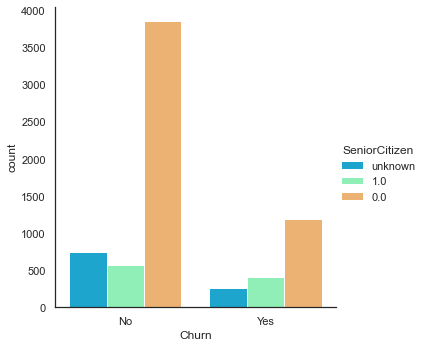

In [26]:
sns.catplot(x="Churn",kind="count",hue="SeniorCitizen",palette="rainbow",data=df)

In [27]:
pd.crosstab(df['Churn'], df['SeniorCitizen'])

SeniorCitizen,0.0,1.0,unknown
Churn,,,
No,3860,566,748
Yes,1197,411,261


In [28]:
# Churn No
muda0 = 3860
tua1 = 566
Unknown = 748
Churn = muda0 + tua1 + Unknown
m_Churn = muda0 / Churn * 100
t_Churn = tua1 / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn No vs SeniorCitizen")

print(f"dari total {Churn} pelanggan, persentase muda sebesar {m_Churn}")
print(f"dari total {Churn} pelanggan, persentase lanjut usia sebesar {t_Churn}")
print(f"dari total {Churn} pelanggan, persentase unknows sebesar {U_Churn}")
total = m_Churn + t_Churn + U_Churn
print(total)

di Churn No vs SeniorCitizen
dari total 5174 pelanggan, persentase muda sebesar 74.60378817162737
dari total 5174 pelanggan, persentase lanjut usia sebesar 10.939311944337069
dari total 5174 pelanggan, persentase unknows sebesar 14.456899884035563
100.0


In [29]:
# Churn Yes 
muda0 = 1197
tua1 = 411
Unknown = 261
Churn = muda0 + tua1 + Unknown
m_Churn = muda0 / Churn * 100
t_Churn = tua1 / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn Yes vs SeniorCitizen")

print(f"dari total {Churn} pelanggan, persentase muda sebesar {m_Churn}")
print(f"dari total {Churn} pelanggan, persentase lanjut usia sebesar {t_Churn}")
print(f"dari total {Churn} pelanggan, persentase unknows sebesar {U_Churn}")
total = m_Churn + t_Churn + U_Churn
print(total)

di Churn Yes vs SeniorCitizen
dari total 1869 pelanggan, persentase muda sebesar 64.04494382022472
dari total 1869 pelanggan, persentase lanjut usia sebesar 21.990369181380416
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862
100.0


Dari Column **Churn vs SeniorCitizen**

**Churn no** = dari total 5174, bukan usia lanjut 74% | usia lanjut 10% | unknown 14%

**Churn yes** = dari total 1869, bukan usia lanjut 64% | usia lanjut 21% | Unknown 13%

Dari data, baik yang Churn maupun tidak, pengguna usia lanjut sedikit. karena juga pada usia ini kami rasa banyak yang 'Gaptek' dan kurang bisa mengikuti jaman, jadi bila misalkan kita beri diskon untuk usia lanjut bakal sia - sia

__________________

## Churn vs Partner

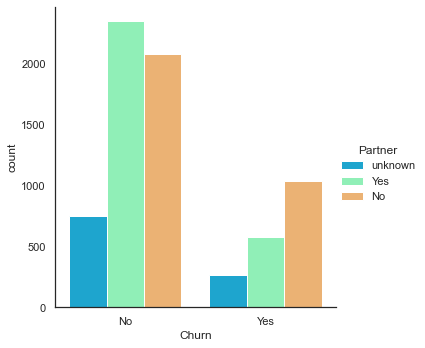

In [30]:
sns.catplot(x="Churn",kind="count",hue="Partner",palette="rainbow",data=df)

In [31]:
pd.crosstab(df['Churn'], df['Partner'])

Partner,No,Yes,unknown
Churn,,,
No,2079,2347,748
Yes,1032,576,261


In [32]:
# Churn No
No = 2079
Yes = 2347
Unknown = 748
Churn = No + Yes + Unknown
n_Churn = No / Churn * 100
y_Churn = Yes / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn No vs Partner")

print(f"dari total {Churn} pelanggan, persentase tidak memiliki pasangan sebesar {n_Churn}")
print(f"dari total {Churn} pelanggan, persentase memiliki pasangan sebesar {y_Churn}")
print(f"dari total {Churn} pelanggan, persentase unknows sebesar {U_Churn}")
total = n_Churn + y_Churn + U_Churn
print(total)

di Churn No vs Partner
dari total 5174 pelanggan, persentase tidak memiliki pasangan sebesar 40.181677618863546
dari total 5174 pelanggan, persentase memiliki pasangan sebesar 45.36142249710089
dari total 5174 pelanggan, persentase unknows sebesar 14.456899884035563
100.0


In [33]:
# Churn Yes
No = 1032
Yes = 576
Unknown = 261
Churn = No + Yes + Unknown
n_Churn = No / Churn * 100
y_Churn = Yes / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn Yes vs Partner")

print(f"dari total {Churn} pelanggan, persentase tidak memiliki pasangan sebesar {n_Churn}")
print(f"dari total {Churn} pelanggan, persentase memiliki pasangan sebesar {y_Churn}")
print(f"dari total {Churn} pelanggan, persentase unknows sebesar {U_Churn}")
total = n_Churn + y_Churn + U_Churn
print(total)

di Churn Yes vs Partner
dari total 1869 pelanggan, persentase tidak memiliki pasangan sebesar 55.21669341894061
dari total 1869 pelanggan, persentase memiliki pasangan sebesar 30.818619582664525
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862
100.0


Dari Column **Churn vs Partner**

**Churn no** = 5174 pelanggarn, tidak memiliki pasangan 40% | memiliki pasangan 45% | unknown 14%

**Churn yes** = 1869 pelanggan, tidak memiliki pasangan 55% | memiliki pasangan 30% | unknown 13%

kenapa dibagian tidak Churn lebih banyak yang memiliki pasangan, disini kami menduga pelanggan tersebut sudah menikah dan berkeluarga sehingga sudah cukup stabil ekonominya.


di bagian churn kami rasa masih anak muda yang masih dalam tahap mengatur keuangan dan masih lebih sering keluar rumah jadi lebih memilih menggunakan layanan internet selular

______________________________

## Churn vs Dependent

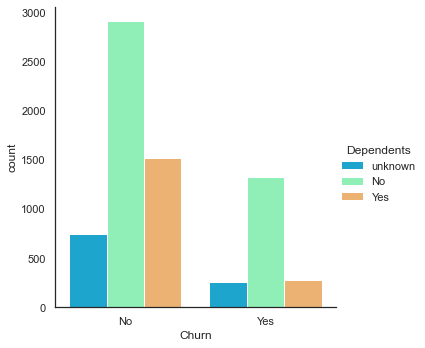

In [34]:
sns.catplot(x="Churn",kind="count",hue="Dependents",palette="rainbow",data=df)

In [35]:
pd.crosstab(df['Churn'], df['Dependents'])

Dependents,No,Yes,unknown
Churn,,,
No,2912,1514,748
Yes,1326,282,261


In [36]:
# Churn No
No = 2912
Yes = 1514
Unknown = 748
Churn = No + Yes + Unknown
n_Churn = No / Churn * 100
y_Churn = Yes / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn No vs Partner")

print(f"dari total {Churn} pelanggan, persentase tidak memiliki tanggungan sebesar {n_Churn}")
print(f"dari total {Churn} pelanggan, persentase memiliki tanggunan sebesar {y_Churn}")
print(f"dari total {Churn} pelanggan, persentase unknows sebesar {U_Churn}")
total = n_Churn + y_Churn + U_Churn
print(total)

di Churn No vs Partner
dari total 5174 pelanggan, persentase tidak memiliki tanggungan sebesar 56.28140703517588
dari total 5174 pelanggan, persentase memiliki tanggunan sebesar 29.261693080788557
dari total 5174 pelanggan, persentase unknows sebesar 14.456899884035563
100.0


In [37]:
# Churn Yes
No = 1326
Yes = 282
Unknown = 261
Churn = No + Yes + Unknown
n_Churn = No / Churn * 100
y_Churn = Yes / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn Yes vs Partner")

print(f"dari total {Churn} pelanggan, persentase tidak memiliki tanggungan sebesar {n_Churn}")
print(f"dari total {Churn} pelanggan, persentase memiliki tanggunan sebesar {y_Churn}")
print(f"dari total {Churn} pelanggan, persentase unknows sebesar {U_Churn}")
total = n_Churn + y_Churn + U_Churn
print(total)

di Churn Yes vs Partner
dari total 1869 pelanggan, persentase tidak memiliki tanggungan sebesar 70.9470304975923
dari total 1869 pelanggan, persentase memiliki tanggunan sebesar 15.08828250401284
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862
100.0


Dari Column **Churn vs Dependent**

**Churn no** = 5174 pelanggan, tidak memiliki tanggungan 56% | memiliki tanggungan 29% | unknown 14%

**Churn yes** = 1869 pelanggan, tidak memiliki tanggungan 70% | memiliki tanggungan 15% | unknown 13%

baik churn maupun dan tidak, tidak memiliki tanggungan. karena mungkin banyak pelanggan bukan dari kalangan orang kaya yang banyak memiliki banyak asuransi

___________________________________________________________________________________________________________

## Churn vs PhoneService

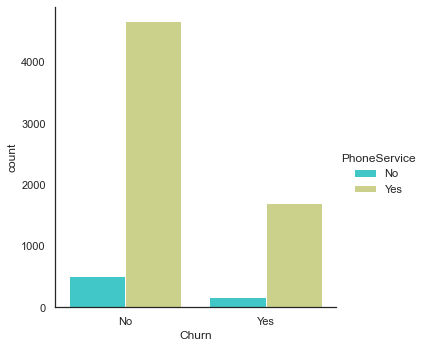

In [38]:
sns.catplot(x="Churn",kind="count",hue="PhoneService",palette="rainbow",data=df)

In [39]:
pd.crosstab(df['Churn'], df['PhoneService'])

PhoneService,No,Yes
Churn,,
No,512,4662
Yes,170,1699


In [40]:
# Churn No
No = 512
Yes = 4662
Churn_No = No + Yes
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100

print(f"di Churn No vs Phone Service")

print(f"dari total {Churn_No} pelanggan, persentase tidak berlangganan Phone Service {n_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase berlangganan Phone Service {y_Churn}%")
total = n_Churn + y_Churn 
print(total,'%')

di Churn No vs Phone Service
dari total 5174 pelanggan, persentase tidak berlangganan Phone Service 9.89563200618477%
dari total 5174 pelanggan, persentase berlangganan Phone Service 90.10436799381523%
100.0 %


In [41]:
# Churn Yes
No = 170
Yes = 1699
Churn_Yes = No + Yes 
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100


print(f"di Churn Yes vs PhoneService")

print(f"dari total {Churn_Yes} pelanggan, persentase tidak berlangganan Phone Service {n_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase berlangganan Phone Service {y_Churn}%")
total = n_Churn + y_Churn 
print(total,'%')

di Churn Yes vs PhoneService
dari total 1869 pelanggan, persentase tidak berlangganan Phone Service 9.095773140716961%
dari total 1869 pelanggan, persentase berlangganan Phone Service 90.90422685928304%
100.0 %


Dari Column **Churn vs PhoneService**

**Churn no** = dari total 5174, berlanggannan Phone Service 90% | tidak berlanggannan Phone Service 10% 

**Churn yes** = dari total 1869, berlanggannan Phone Service 91% | tidak berlanggannan Phone Service 9% 

Menurut kami,layanan Phone Service sudah cukup baik dibuktikan dengan kurang lebih 90% dari pelanggan yang Churnnya No maupun yang yes.Langkah kedepannya,menurut kami lebih baik untuk pelanggan yang churnnya yes dan phoneservice yes agar diberikan diskon supaya dapat berlangganan kembali (Churn == No)

______________________________________

## Churn vs MultipleLines

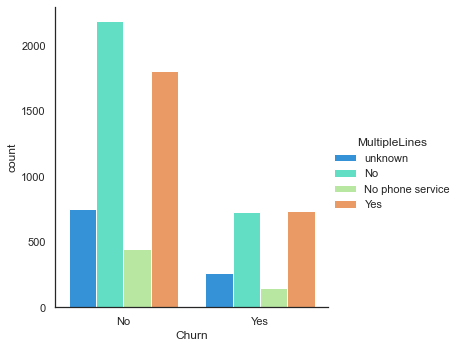

In [42]:
sns.catplot(x="Churn",kind="count",hue="MultipleLines",palette="rainbow",data=df)

In [43]:
pd.crosstab(df['Churn'], df['MultipleLines'])

MultipleLines,No,No phone service,Yes,unknown
Churn,,,,
No,2184,442,1800,748
Yes,724,147,737,261


In [44]:
# Churn No
No = 2184
No_phone_service = 442
Yes = 1800
Unknown = 748
Churn_No = No + Yes + Unknown + No_phone_service
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100
U_Churn = Unknown / Churn_No * 100
No_phone_Churn = No_phone_service / Churn_No * 100

print(f"di Churn No vs Multiple Lines")

print(f"dari total {Churn_No} pelanggan, persentase tidak berlangganan Multiple Lines {n_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase tidak memiliki phone service sebesar {No_phone_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase berlangganan Multiple Lines {y_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase unknows sebesar {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_phone_Churn
print(total,'%')

di Churn No vs Multiple Lines
dari total 5174 pelanggan, persentase tidak berlangganan Multiple Lines 42.211055276381906%
dari total 5174 pelanggan, persentase tidak memiliki phone service sebesar 8.542713567839195%
dari total 5174 pelanggan, persentase berlangganan Multiple Lines 34.789331271743336%
dari total 5174 pelanggan, persentase unknows sebesar 14.456899884035563%
100.00000000000001 %


In [45]:
# Churn Yes
No = 724
No_phone_service = 147
Yes = 737
Unknown = 261
Churn_Yes = No + Yes + Unknown + No_phone_service
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100
U_Churn = Unknown / Churn_Yes * 100
No_phone_Churn = No_phone_service / Churn_Yes * 100

print(f"di Churn No vs Multiple Lines")

print(f"dari total {Churn_Yes} pelanggan, persentase tidak berlangganan Multiple Lines {n_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase tidak memiliki phone service sebesar {No_phone_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase berlangganan Multiple Lines {y_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase unknows sebesar {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_phone_Churn
print(total,'%')

di Churn No vs Multiple Lines
dari total 1869 pelanggan, persentase tidak berlangganan Multiple Lines 38.737292669876936%
dari total 1869 pelanggan, persentase tidak memiliki phone service sebesar 7.865168539325842%
dari total 1869 pelanggan, persentase berlangganan Multiple Lines 39.43285179240236%
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862%
100.0 %


Dari Column **Churn vs Multiple Lines**

**Churn no** = dari total 5174, berlangganan Multiple Lines 35% | tidak berlangganan Multiple Lines 42% | tidak memiliki phone service sebesar 9%

pelanggan yang datanya unknown 14%

**Churn yes** = dari total 1869, berlangganan Multiple Lines 39% | tidak berlangganan Multiple Lines 39% | tidak memiliki phone service sebesar 8% | pelanggan yang datanya unknown  14%

Baik churn dan tidak churn, lebih banyak yang tidak menggunakan Multiple Lines. Saran kami multiple Lines lebih di promosikan Perusahaan karena lebih digunakan. Untuk pelanggan individual jarang menggunakannya.

_____________________________________

## Churn vs InternetService

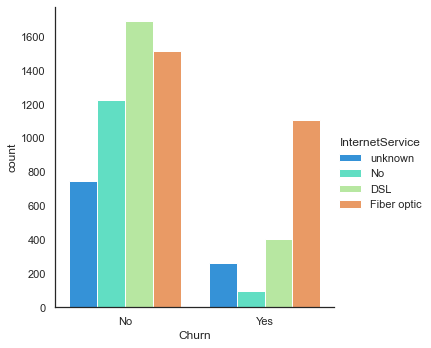

In [46]:
sns.catplot(x="Churn",kind="count",hue="InternetService",palette="rainbow",data=df)

In [47]:
pd.crosstab(df['Churn'], df['InternetService'])

InternetService,DSL,Fiber optic,No,unknown
Churn,,,,
No,1691,1512,1223,748
Yes,401,1109,98,261


In [48]:
# Churn No
DSL = 1691
FiberOptic = 1512
No = 1223
Unknown = 748
Churn_No = DSL + FiberOptic + No + Unknown

DSL_Churn = DSL / Churn_No * 100
FiberOptic_Churn = FiberOptic / Churn_No * 100
No_Churn = No / Churn_No * 100
Unknown_Churn = Unknown / Churn_No * 100


print(f"di Churn No vs Internet Service")

print(f"dari total {Churn_No} pelanggan, persentase berlanggannan Internet Service dengan DSL {DSL_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase berlanggannan Internet Service dengan Fiber Optic {FiberOptic_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase tidak berlanggannan Internet Service {No_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase unknows sebesar {Unknown_Churn}%")
total = DSL_Churn + FiberOptic_Churn + No_Churn + Unknown_Churn
print(total,'%')

di Churn No vs Internet Service
dari total 5174 pelanggan, persentase berlanggannan Internet Service dengan DSL 32.682643989176654%
dari total 5174 pelanggan, persentase berlanggannan Internet Service dengan Fiber Optic 29.2230382682644%
dari total 5174 pelanggan, persentase tidak berlanggannan Internet Service 23.637417858523385%
dari total 5174 pelanggan, persentase unknows sebesar 14.456899884035563%
100.00000000000001 %


In [49]:
# Churn Yes
DSL = 401
FiberOptic = 1109
No = 98
Unknown = 261
Churn_Yes = DSL + FiberOptic + No + Unknown

DSL_Churn = DSL / Churn_Yes * 100
FiberOptic_Churn = FiberOptic / Churn_Yes * 100
No_Churn = No / Churn_Yes * 100
Unknown_Churn = Unknown / Churn_Yes * 100


print(f"di Churn Yes vs Internet Service")

print(f"dari total {Churn_Yes} pelanggan, persentase berlanggannan Internet Service dengan DSL {DSL_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase berlanggannan Internet Service dengan Fiber Optic {FiberOptic_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase tidak berlanggannan Internet Service {No_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase unknows sebesar {Unknown_Churn}%")
total = DSL_Churn + FiberOptic_Churn + No_Churn + Unknown_Churn
print(total,'%')

di Churn Yes vs Internet Service
dari total 1869 pelanggan, persentase berlanggannan Internet Service dengan DSL 21.455323702514715%
dari total 1869 pelanggan, persentase berlanggannan Internet Service dengan Fiber Optic 59.336543606206526%
dari total 1869 pelanggan, persentase tidak berlanggannan Internet Service 5.2434456928838955%
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862%
100.0 %


Dari Column **Churn vs Internet Service**

**Churn no** = dari total 5174, berlanggannan DSL sebesar 33 % | berlanggannan Fiber Optic sebesar 29 % | tidak berlanggannan internet service sebesar 24 % | datanya yang Unknown 14 %

**Churn yes** = dari total 1869, berlanggannan DSL sebesar 22 % | berlanggannan Fiber Optic sebesar 59 % | tidak berlanggannan internet service sebesar 5 % | datanya yang Unknown 14 %

* Menurut kami, layannan DSL merupakan layannan unggulan terlihat dari data churn No dengan persentase paling besar yaitu DSL sebesar 33 % .
* Menurut kami, layannan Fiber Optic merupakan layannan yang kurang bagus hal ini terlihat dari churn yang bernilai yes (meninggalkan layannan kita) sebesar 59 %. Jadi,setiap pelanggan yang meninggalkan layannan kita (Churn == Yes) pernah memakai Fiber Optic dan Fiber Optic bernilai paling besar
* kemungkinan biaya Fiber Optic lebih mahal ketimbang DSL, jadi sepertinya pelanggan lebih memilih menggunakan layanan DSL

_____________

## Churn vs OnlineSecurity

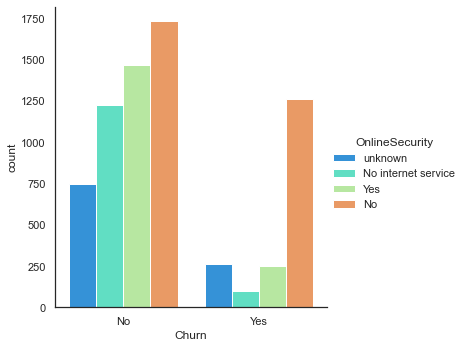

In [50]:
sns.catplot(x="Churn",kind="count",hue="OnlineSecurity",palette="rainbow",data=df)

In [51]:
pd.crosstab(df['Churn'], df['OnlineSecurity'])

OnlineSecurity,No,No internet service,Yes,unknown
Churn,,,,
No,1734,1223,1469,748
Yes,1259,98,251,261


Apakah pelanggan memiliki keamanan online atau tidak (Ya, Tidak, Tidak ada layanan internet)

dilihat dari data lebih banyak yang tidak menggunakan keamanan online

* OnlineSecurity berdasarkan Churn terdapat berbagai macam customer yaitu (Yes : Berlanggannan OnlineSecurity; No : Tidak berlanggannan ; No internet service ; Unknown : Datanya kosong)

*  Dari 5174 customer yang Churnnya No,sebanyak 33.5% pelanggan tidak berlangganan Online Backup.Kemungkinan belum mengetahui fitur Online Backup. sebanyak 23.6% tidak memiliki koneksi internet. Sebanyak 28.3% berlangganan dan 14.4% tidak diketahui statusnya. 

* Dari 1869 customer yang Churnnya Yes,sebanyak 67.3% pelanggan tidak berlangganan Online Backup.Kemungkinan belum mengetahui fitur Online Backup. sebanyak 5.2% tidak memiliki koneksi internet. Sebanyak 13.4% berlangganan dan 13.9% tidak diketahui statusnya.

dari data Churn, ternyata banyak yang tidak menggunakan layanan OnlineSecurity, jadi kami rasa pelanggan tersebut pernah mengalami _phising_, pop up iklan yang mengganggu, dll. sehingga kurang nyaman dalam berselancar di internet

**saran kami lebih di sosialisasikan kembali soal Online Security mengingat keamanan data itu penting.**

_________________

## Churn vs OnlineBackup

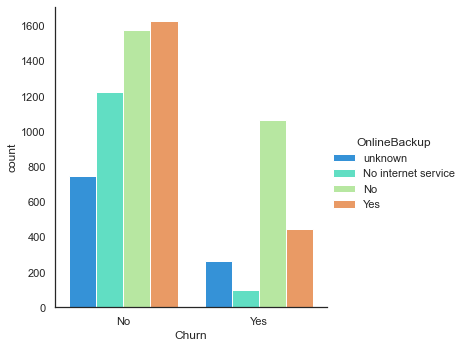

In [52]:
sns.catplot(x="Churn",kind="count",hue="OnlineBackup",palette="rainbow",data=df)

In [53]:
pd.crosstab(df['Churn'], df['OnlineBackup'])

OnlineBackup,No,No internet service,Yes,unknown
Churn,,,,
No,1576,1223,1627,748
Yes,1067,98,443,261


* Online backup berdasarkan Churn, apakah pelanggan memiliki online backup atau tidak ? (Ya, Tidak, Tidak ada layanan internet,Unknown)

* dilihat dari data lebih banyak yang menggunakan Online Backup untuk pelanggan yang Churnnya yes,mungkin pelanggan yang churnnya Yes kemungkinan besar beliau belum pernah mencoba fitur online backup.Karena sebanyak 57% dari 1869 customer dari yang Chunrnya Yes belum berlanggannan Online Backup

* OnlineBackup berdasarkan Churn terdapat berbagai macam customer yaitu (Yes : Berlanggannan Online Backup ; No : Tidak berlanggannan ; No internet service ; Unknown : Datanya kosong)

*  Dari 5174 customer yang Churnnya No,sebanyak 30.45% pelanggan tidak berlangganan Online Backup.Kemungkinan belum mengetahui fitur Online Backup. sebanyak 23.6% tidak memiliki koneksi internet. Sebanyak 31.4% berlangganan dan 14.4% tidak diketahui statusnya. 

* Dari 1869 customer yang Churnnya Yes,sebanyak 57% pelanggan tidak berlangganan Online Backup.Kemungkinan belum mengetahui fitur Online Backup. sebanyak 5.2% tidak memiliki koneksi internet. Sebanyak 23.7% berlangganan dan 13.4% tidak diketahui statusnya.

dari data tidak Churn, banyak yang menggunakan OnlineBackup, saya rasa pelanggan puas dengan layanan OnlineBackUp

dari data Churn, banyak pelanggan yang tidak menggunakan layanan Online BackUp, saran kami sosialisasikan layanan Online Backup ini, selain bisa mencadangkan data, Data Telco bisa membuat pelanggan percaya bila layanan Online Backup bagus

____________________

## Churn vs DeviceProtection

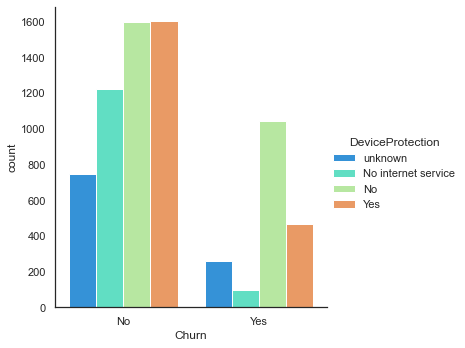

In [54]:
sns.catplot(x="Churn",kind="count",hue="DeviceProtection",palette="rainbow",data=df)

In [55]:
pd.crosstab(df['Churn'], df['DeviceProtection'])

DeviceProtection,No,No internet service,Yes,unknown
Churn,,,,
No,1600,1223,1603,748
Yes,1043,98,467,261


* DeviceProtection berdasarkan Churn terdapat berbagai macam customer yaitu (Yes : Berlanggannan Device Protection ; No : Tidak berlanggannan Device Protection ; No internet service ; Unknown : Datanya kosong)

* Berdasarkan Churn No (Customer yang masih berlanggannan dengan telco).Untuk pelanggan Churnnya No, yang masih berlanggannan dengan Device Protection jumlahnya hampir sama dengan yang tidak berlanggannan dengan Device Protection. 

* Dari 1869 customer yang Churnnya Yes,sebanyak 55% pelanggan belum melakukan Device Protection.Kemungkinan belum mengetahui fitur device protection

* DeviceProtection berdasarkan Churn terdapat berbagai macam customer yaitu (Yes : Berlanggannan Device Protection ; No : Tidak berlanggannan Device Protection ; No internet service ; Unknown : Datanya kosong)

*  Dari 5174 customer yang Churnnya No,sebanyak 30.9% pelanggan tidak berlangganan Device Protection.Kemungkinan belum mengetahui fitur device protection. sebanyak 23.6% tidak memiliki koneksi internet. Sebanyak 30.9% berlangganan dan 14.4% tidak diketahui statusnya. 

* Dari 1869 customer yang Churnnya Yes,sebanyak 55% pelanggan tidak berlangganan Device Protection.Kemungkinan belum mengetahui fitur device protection. sebanyak 5.2% tidak memiliki koneksi internet. Sebanyak 24.9% berlangganan dan 13% tidak diketahui statusnya.

_______________

## Churn vs TechSupport

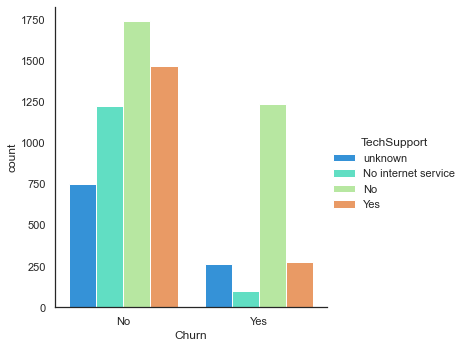

In [56]:
sns.catplot(x="Churn",kind="count",hue="TechSupport",palette="rainbow",data=df)

In [57]:
pd.crosstab(df['Churn'], df['TechSupport'])

TechSupport,No,No internet service,Yes,unknown
Churn,,,,
No,1738,1223,1465,748
Yes,1235,98,275,261


In [58]:
# Churn No
No = 1738
No_internet = 1223
Yes = 1465
Unknown = 748
Churn_No = No + Yes + Unknown + No_internet
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100
U_Churn = Unknown / Churn_No * 100
No_int_Churn = No_internet / Churn_No * 100

print(f"di Churn No vs TechSupport")

print(f"dari total {Churn_No} pelanggan, persentase tidak berlangganan tech support {n_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase tidak memiliki service internet sebesar {No_int_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase berlangganan tech support {y_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase unknows sebesar {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn No vs TechSupport
dari total 5174 pelanggan, persentase tidak berlangganan tech support 33.59103208349439%
dari total 5174 pelanggan, persentase tidak memiliki service internet sebesar 23.637417858523385%
dari total 5174 pelanggan, persentase berlangganan tech support 28.314650173946653%
dari total 5174 pelanggan, persentase unknows sebesar 14.456899884035563%
100.0 %


In [59]:
# Churn Yes
No = 1235
No_internet = 98
Yes = 275
Unknown = 261
Churn_Yes = No + Yes + Unknown + No_internet
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100
U_Churn = Unknown / Churn_Yes * 100
No_int_Churn = No_internet / Churn_Yes * 100

print(f"di Churn Yes vs TechSupport")

print(f"dari total {Churn_Yes} pelanggan, persentase tidak berlangganan tech support {n_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase tidak memiliki service internet sebesar {No_int_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase berlangganan tech support {y_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase unknows sebesar {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn Yes vs TechSupport
dari total 1869 pelanggan, persentase tidak berlangganan tech support 66.0781166399144%
dari total 1869 pelanggan, persentase tidak memiliki service internet sebesar 5.2434456928838955%
dari total 1869 pelanggan, persentase berlangganan tech support 14.71375066880685%
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862%
100.00000000000001 %


* Tech Support berdasarkan Churn terdapat berbagai macam customer yaitu (Yes : Berlanggannan Tech Support ; No : Tidak berlanggannan Tech Support ; No internet service ; Unknown : Datanya kosong)

* Berdasarkan Churn yang bernilai No (Customer yang masih berlanggannan dengan telco).Untuk pelanggan Churnnya yang nilainya No, yang masih berlanggannan dengan Tech Support jumlahnya hampir sama dengan yang tidak berlanggannan dengan Tech Support.Dengan perbandingan antara yang menggunakan Tech support dengan yang tidak yaitu 10:11 

* Dari 1869 customer yang Churnnya Yes,sebanyak 66% pelanggan belum melakukan Tech Support.Kemungkinan belum mengetahui fitur Tech Support

* 

_________________________________

## Churn vs StreamingTV

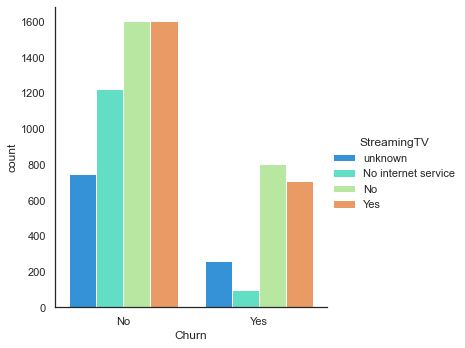

In [60]:
sns.catplot(x="Churn",kind="count",hue="StreamingTV",palette="rainbow",data=df)

In [61]:
pd.crosstab(df['Churn'], df['StreamingTV'])

StreamingTV,No,No internet service,Yes,unknown
Churn,,,,
No,1601,1223,1602,748
Yes,802,98,708,261


In [62]:
# Churn No
No = 1601
No_internet = 1223
Yes = 1602
Unknown = 748
Churn_No = No + Yes + Unknown + No_internet
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100
U_Churn = Unknown / Churn_No * 100
No_int_Churn = No_internet / Churn_No * 100

print(f"di Churn No vs StreamingTV")

print(f"dari total {Churn_No} pelanggan, persentase tidak berlangganan tech support {n_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase tidak memiliki service internet sebesar {No_int_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase berlangganan tech support {y_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase unknows sebesar {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn No vs StreamingTV
dari total 5174 pelanggan, persentase tidak berlangganan tech support 30.943177425589486%
dari total 5174 pelanggan, persentase tidak memiliki service internet sebesar 23.637417858523385%
dari total 5174 pelanggan, persentase berlangganan tech support 30.962504831851568%
dari total 5174 pelanggan, persentase unknows sebesar 14.456899884035563%
100.0 %


In [63]:
# Churn Yes
No = 802
No_internet = 98
Yes = 708
Unknown = 261
Churn_Yes = No + Yes + Unknown + No_internet
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100
U_Churn = Unknown / Churn_Yes * 100
No_int_Churn = No_internet / Churn_Yes * 100

print(f"di Churn Yes vs StreamingTV")

print(f"dari total {Churn_Yes} pelanggan, persentase tidak berlangganan tech support {n_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase tidak memiliki service internet sebesar {No_int_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase berlangganan tech support {y_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase unknows sebesar {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn Yes vs StreamingTV
dari total 1869 pelanggan, persentase tidak berlangganan tech support 42.91064740502943%
dari total 1869 pelanggan, persentase tidak memiliki service internet sebesar 5.2434456928838955%
dari total 1869 pelanggan, persentase berlangganan tech support 37.881219903691814%
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862%
100.0 %


* StreamingTV berdasarkan Churn terdapat berbagai macam customer yaitu (Yes : Berlanggannan StreamingTV ; No : Tidak berlanggannan StreamingTV ; No internet service ; Unknown : Datanya kosong)

* Berdasarkan Churn yang bernilai No (Customer yang masih berlanggannan dengan telco).Untuk pelanggan Churnnya yang nilainya No, yang masih berlanggannan dengan StreamingTV jumlahnya hampir sama dengan yang tidak berlanggannan dengan StreamingTV.Dengan perbandingan antara yang menggunakan StreamingTV dengan yang tidak yaitu mendekati 50:50

* Dari 1869 customer yang Churnnya nilai Yes,selisih antara yang beralanggannan StreamingTV dengan yang tidak yaitu sejumlah 94 customer.Kemungkinnan customer tersebut belum mengetahui adanya layannan StreamingTV

___________________________________

## Churn vs StreamingMovies

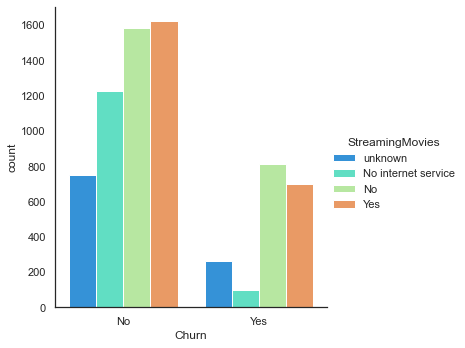

In [64]:
sns.catplot(x="Churn",kind="count",hue="StreamingMovies",palette="rainbow",data=df)

In [65]:
pd.crosstab(df['Churn'], df['StreamingMovies'])

StreamingMovies,No,No internet service,Yes,unknown
Churn,,,,
No,1581,1223,1622,748
Yes,813,98,697,261


In [66]:
# Churn No
No = 1581
No_internet = 1223
Yes = 1662
Unknown = 748
Churn_No = No + Yes + Unknown + No_internet
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100
U_Churn = Unknown / Churn_No * 100
No_int_Churn = No_internet / Churn_No * 100

print(f"di Churn No vs StreamingMovies")

print(f"dari total {Churn_No} pelanggan, persentase tidak berlangganan tech support {n_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase tidak memiliki service internet sebesar {No_int_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase berlangganan tech support {y_Churn}%")
print(f"dari total {Churn_No} pelanggan, persentase unknows sebesar {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn No vs StreamingMovies
dari total 5214 pelanggan, persentase tidak berlangganan tech support 30.322209436133484%
dari total 5214 pelanggan, persentase tidak memiliki service internet sebesar 23.456079785193708%
dari total 5214 pelanggan, persentase berlangganan tech support 31.875719217491373%
dari total 5214 pelanggan, persentase unknows sebesar 14.345991561181433%
100.0 %


In [67]:
# Churn Yes
No = 813
No_internet = 98
Yes = 697
Unknown = 261
Churn_Yes = No + Yes + Unknown + No_internet
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100
U_Churn = Unknown / Churn_Yes * 100
No_int_Churn = No_internet / Churn_Yes * 100

print(f"di Churn Yes vs StreamingMovies")

print(f"dari total {Churn_Yes} pelanggan yang berhenti, persentase tidak berlangganan tech support {n_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase tidak memiliki service internet sebesar {No_int_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase berlangganan tech support {y_Churn}%")
print(f"dari total {Churn_Yes} pelanggan, persentase unknows sebesar {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn Yes vs StreamingMovies
dari total 1869 pelanggan yang berhenti, persentase tidak berlangganan tech support 43.4991974317817%
dari total 1869 pelanggan, persentase tidak memiliki service internet sebesar 5.2434456928838955%
dari total 1869 pelanggan, persentase berlangganan tech support 37.29266987693954%
dari total 1869 pelanggan, persentase unknows sebesar 13.964686998394862%
100.0 %


* StreamingMovies berdasarkan Churn terdapat berbagai macam customer yaitu (Yes : Berlanggannan StreamingMovies; No : Tidak berlanggannan StreamingMovies ; No internet service ; Unknown : Datanya kosong)

* Berdasarkan Churn yang bernilai No (Customer yang masih berlanggannan dengan telco).Untuk pelanggan Churnnya yang nilainya No, yang masih berlanggannan dengan StreamingMovies jumlahnya hampir sama dengan yang tidak berlanggannan dengan StreamingMovies.Dengan perbandingan antara yang menggunakan StreamingMovies dengan yang tidak yaitu mendekati 50:50

* Dari 1869 customer yang Churnnya nilai Yes,selisih antara yang beralanggannan StreamingMovies dengan yang tidak yaitu sejumlah 116 customer.Kemungkinnan customer tersebut belum mengetahui adanya layannan StreamingMovies

________________

## Churn vs Contract

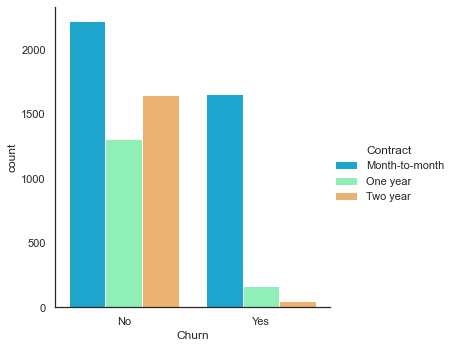

In [68]:
sns.catplot(x="Churn",kind="count",hue="Contract",palette="rainbow",data=df)

In [69]:
pd.crosstab(df['Churn'], df['Contract'])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [70]:
# Churn No
Month_to_month = 2220
One_year = 1307
Two_year = 1647
Churn = Month_to_month + One_year + Two_year
month_Churn = Month_to_month / Churn * 100
oneyear_Churn = One_year / Churn * 100
twoyear_Churn = Two_year / Churn * 100

print(f"di Churn No vs Contract")

print(f"dari total {Churn} pelanggan, persentase month to month sebesar {month_Churn}")
print(f"dari total {Churn} pelanggan, persentase one year sebesar {oneyear_Churn}")
print(f"dari total {Churn} pelanggan, persentase two year sebesar {twoyear_Churn}")
total = month_Churn + oneyear_Churn + twoyear_Churn
print(total)

di Churn No vs Contract
dari total 5174 pelanggan, persentase month to month sebesar 42.906841901816776
dari total 5174 pelanggan, persentase one year sebesar 25.260919984538077
dari total 5174 pelanggan, persentase two year sebesar 31.83223811364515
100.0


In [71]:
# Churn Yes
Month_to_month = 1655
One_year = 166
Two_year = 48
Churn = Month_to_month + One_year + Two_year
month_Churn = Month_to_month / Churn * 100
oneyear_Churn = One_year / Churn * 100
twoyear_Churn = Two_year / Churn * 100

print(f"di Churn Yes vs Contract")

print(f"dari total {Churn} pelanggan, persentase month to month sebesar {month_Churn}")
print(f"dari total {Churn} pelanggan, persentase one year sebesar {oneyear_Churn}")
print(f"dari total {Churn} pelanggan, persentase two year sebesar {twoyear_Churn}")
total = month_Churn + oneyear_Churn + twoyear_Churn
print(total)

di Churn Yes vs Contract
dari total 1869 pelanggan, persentase month to month sebesar 88.55002675227395
dari total 1869 pelanggan, persentase one year sebesar 8.881754949170679
dari total 1869 pelanggan, persentase two year sebesar 2.568218298555377
100.00000000000001


Dari Column **Churn vs Contract**

**Churn no** = dari total 5174, month to month 42% | one year 25% | two year 31%

**Churn yes** = dari total 1869, month to month 88% | one year 8% | two year 2%

Barchart diatas menunjukkan jumlah Churn berdasarkan kategori Contract. Dilihat dari barchart, jumlah pelanggan yang Churn didominasi oleh pelanggan dengan kontrak month-to-month. kami rasa pelanggan tersebut Churn karena hanya ingin coba coba, bila layanan buruk pelanggan tidak perlu pusing memperpanjang karena juga biaya yang dikeluarkan lebih sedikit, tidak sebanyak one year dan two year.

**Saran, perbaiki layanan terhadap pelanggan baru**

______________________

## Churn vs Papperless Billing

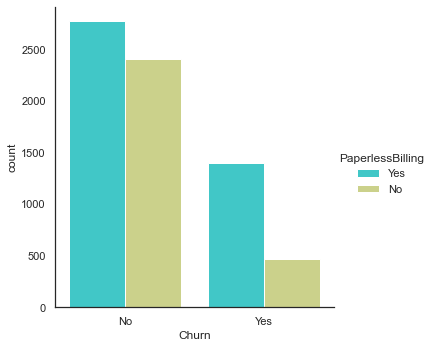

In [72]:
sns.catplot(x="Churn",kind="count",hue="PaperlessBilling",palette="rainbow",data=df)

In [73]:
pd.crosstab(df['Churn'], df['PaperlessBilling'])

PaperlessBilling,No,Yes
Churn,,
No,2403,2771
Yes,469,1400


In [74]:
# Churn No
No = 2403
Yes = 2771
Churn = No + Yes
paperless_No = No / Churn * 100
paperless_Yes = Yes / Churn * 100

print(f"di Churn No vs Paperbilling")

print(f"dari total {Churn} pelanggan, persentase Yes sebesar {paperless_No}")
print(f"dari total {Churn} pelanggan, persentase No sebesar {paperless_Yes}")
total = paperless_No + paperless_Yes
print(total)

di Churn No vs Paperbilling
dari total 5174 pelanggan, persentase Yes sebesar 46.44375724777735
dari total 5174 pelanggan, persentase No sebesar 53.55624275222265
100.0


In [75]:
# Churn Yes
No = 469
Yes = 1400
Churn = No + Yes
paperless_No = No / Churn * 100
paperless_Yes = Yes / Churn * 100

print(f"di Churn Yes vs Paperbilling")

print(f"dari total {Churn} pelanggan, persentase Yes sebesar {paperless_No}")
print(f"dari total {Churn} pelanggan, persentase No sebesar {paperless_Yes}")
total = paperless_No + paperless_Yes
print(total)

di Churn Yes vs Paperbilling
dari total 1869 pelanggan, persentase Yes sebesar 25.0936329588015
dari total 1869 pelanggan, persentase No sebesar 74.90636704119851
100.0


Dari Column **Churn vs PapperlessBilling**

**Churn no** = dari total 5174, penagihan tanpa kwitansi 46% | dengan kwitansi 53%

**Churn yes** = dari total 1869, penagihan tanpa kwitansi 25% | dengan kwitansi 74%

Barchart diatas menunjukkan jumlah Churn berdasarkan kategori PaperlessBilling. Dilihat dari barchart, jumlah pelanggan yang Churn memilih tidak menggunakan paperbilling lebih banyak dibandingkan dengan pelanggan Churn dengan PaperlessBilling. Begitu juga dengan pelanggan yang tidak Churn memiliki proporsi yang sama.

____________________________________________

## Churn vs PaymentMethod

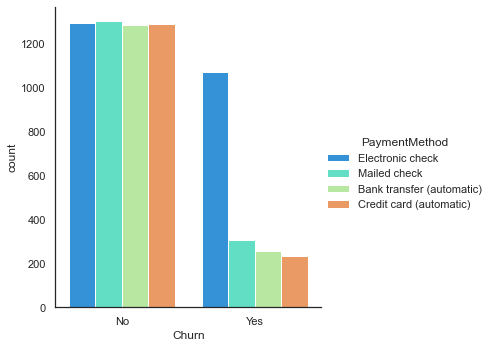

In [76]:
sns.catplot(x="Churn",kind="count",hue="PaymentMethod",palette="rainbow",data=df)

In [77]:
pd.crosstab(df['Churn'], df['PaymentMethod'])

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


In [78]:
# Churn No
bank_transfer = 1286
credit_card = 1290
electronic_check = 1294
mailed_check = 1304
Churn = bank_transfer + credit_card + electronic_check + mailed_check
transfer_Churn = bank_transfer  / Churn * 100
credit_card_Churn = credit_card / Churn * 100
electronic_Churn = electronic_check / Churn * 100
mailed_churn = mailed_check / Churn * 100

print(f"di Churn No vs PaymentMethod")

print(f"dari total {Churn} pelanggan, pembayaran menggunakan bank / transfer sebesar {transfer_Churn}")
print(f"dari total {Churn} pelanggan, pembayaran menggunakan kredit sebesar {credit_card_Churn}")
print(f"dari total {Churn} pelanggan, persentase electronic check sebesar {electronic_Churn}")
print(f"dari total {Churn} pelanggan, persentase email sebesar {mailed_churn}")
total = transfer_Churn + credit_card_Churn + electronic_Churn + mailed_churn
print(total)

di Churn No vs PaymentMethod
dari total 5174 pelanggan, pembayaran menggunakan bank / transfer sebesar 24.855044453034402
dari total 5174 pelanggan, pembayaran menggunakan kredit sebesar 24.93235407808272
dari total 5174 pelanggan, persentase electronic check sebesar 25.00966370313104
dari total 5174 pelanggan, persentase email sebesar 25.202937765751837
100.0


In [79]:
# Churn Yes
bank_transfer = 258
credit_card = 232
electronic_check = 1071
mailed_check = 308
Churn = bank_transfer + credit_card + electronic_check + mailed_check
transfer_Churn = bank_transfer  / Churn * 100
credit_card_Churn = credit_card / Churn * 100
electronic_Churn = electronic_check / Churn * 100
mailed_churn = mailed_check / Churn * 100

print(f"di Churn No vs PaymentMethod")

print(f"dari total {Churn} pelanggan, pembayaran menggunakan bank / transfer sebesar {transfer_Churn}")
print(f"dari total {Churn} pelanggan, pembayaran menggunakan kredit sebesar {credit_card_Churn}")
print(f"dari total {Churn} pelanggan, persentase electronic check sebesar {electronic_Churn}")
print(f"dari total {Churn} pelanggan, persentase email sebesar {mailed_churn}")
total = transfer_Churn + credit_card_Churn + electronic_Churn + mailed_churn
print(total)

di Churn No vs PaymentMethod
dari total 1869 pelanggan, pembayaran menggunakan bank / transfer sebesar 13.804173354735152
dari total 1869 pelanggan, pembayaran menggunakan kredit sebesar 12.413055109684324
dari total 1869 pelanggan, persentase electronic check sebesar 57.30337078651685
dari total 1869 pelanggan, persentase email sebesar 16.479400749063668
100.0


Dari Column **Churn vs PapperlessBilling**

**Churn no** = dari total 5174, membayar dengan bank 24.8% | dengan kredit 24.9% | dengan electronik cek 25% | dengan email 25.2%

**Churn yes** = dari total 1869, membayar dengan bank 13.8% | dengan kredit 12.9% | dengan electronik cek 57% | dengan email 16.4%

Barchart diatas menunjukkan jumlah Churn berdasarkan kategori Paymentmethod. Dilihat dari barchart, jumlah pelanggan yang Churn paling banyak menggunakan metode pembayaran Electronic check dan Churn paling sedikit dengan metode pembayaran Credit card.

# Feature Engineer

In [80]:
df['Contract'] = df['Contract'].map({"Month-to-month":0,"One year":1,"Two year":2})

In [81]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [82]:
gender_enc = pd.get_dummies(df['gender'], prefix = 'gender', drop_first = True)
sc_enc = pd.get_dummies(df['SeniorCitizen'], prefix = 'SeniorCitizen', drop_first = True)
partner_enc = pd.get_dummies(df['Partner'], prefix = 'Partner', drop_first = True)
depen_enc = pd.get_dummies(df['Dependents'], prefix = 'Dependents', drop_first = True)
ps_enc = pd.get_dummies(df['PhoneService'], prefix = 'PhoneService', drop_first = True)
ml_enc = pd.get_dummies(df['MultipleLines'], prefix = 'MultipleLines', drop_first = True)
is_enc = pd.get_dummies(df['InternetService'], prefix = 'InternetService', drop_first = True)
os_enc = pd.get_dummies(df['OnlineSecurity'], prefix = 'OnlineSecurity', drop_first = True)
ob_enc = pd.get_dummies(df['OnlineBackup'], prefix = 'OnlineBackup', drop_first = True)
dp_enc = pd.get_dummies(df['DeviceProtection'], prefix = 'DeviceProtection', drop_first = True)
ts_enc = pd.get_dummies(df['TechSupport'], prefix = 'TechSupport', drop_first = True)
st_enc = pd.get_dummies(df['StreamingTV'], prefix = 'StreamingTV', drop_first = True)
sm_enc = pd.get_dummies(df['StreamingMovies'], prefix = 'StreamingMovies', drop_first = True)
pb_enc = pd.get_dummies(df['PaperlessBilling'], prefix = 'PaperlessBilling', drop_first = True)
ob_enc = pd.get_dummies(df['PaymentMethod'], prefix = 'PaymentMethod', drop_first = True)
churc_enc = pd.get_dummies(df['Churn'], prefix = 'Churn', drop_first = True)

In [83]:
df=df.drop(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn'], axis=1)

In [84]:
df

,customerID,tenure,Contract,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,0,29.85,29.85
1,5575-GNVDE,34,1,56.95,1889.50
2,3668-QPYBK,2,0,53.85,108.15
3,7795-CFOCW,45,1,42.30,1840.75
4,9237-HQITU,2,0,70.70,151.65
...,...,...,...,...,...
7038,6840-RESVB,24,1,84.80,1990.50
7039,2234-XADUH,72,1,103.20,7362.90
7040,4801-JZAZL,11,0,29.60,346.45
7041,8361-LTMKD,4,0,74.40,306.60


In [85]:
df=pd.concat([df,gender_enc,sc_enc,partner_enc,depen_enc,ps_enc,ml_enc,is_enc,os_enc,ob_enc,dp_enc,ts_enc,st_enc,sm_enc,pb_enc,ob_enc,churc_enc], axis=1)
df

,customerID,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,gender_unknown,SeniorCitizen_1.0,SeniorCitizen_unknown,Partner_Yes,...,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingMovies_unknown,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,0,29.85,29.85,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
1,5575-GNVDE,34,1,56.95,1889.50,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,3668-QPYBK,2,0,53.85,108.15,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,1
3,7795-CFOCW,45,1,42.30,1840.75,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,2,0,70.70,151.65,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,84.80,1990.50,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
7039,2234-XADUH,72,1,103.20,7362.90,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,0
7040,4801-JZAZL,11,0,29.60,346.45,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,4,0,74.40,306.60,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [86]:
df.dtypes

customerID                                object
tenure                                     int64
Contract                                   int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
gender_unknown                             uint8
SeniorCitizen_1.0                          uint8
SeniorCitizen_unknown                      uint8
Partner_Yes                                uint8
Partner_unknown                            uint8
Dependents_Yes                             uint8
Dependents_unknown                         uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
MultipleLines_unknown                      uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
InternetService_unknown                    uint8
OnlineSecurity_No in

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

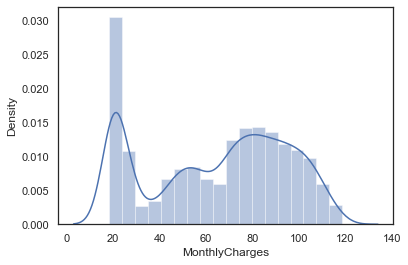

In [87]:
sns.distplot(df["MonthlyCharges"])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

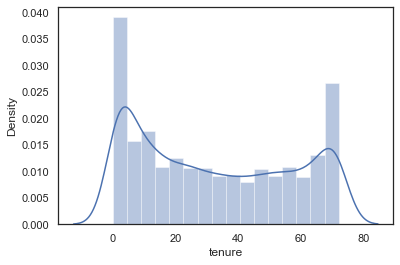

In [88]:
sns.distplot(df["tenure"])

In [89]:
scaler = MinMaxScaler()
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])

In [90]:
df

,customerID,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,gender_unknown,SeniorCitizen_1.0,SeniorCitizen_unknown,Partner_Yes,...,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingMovies_unknown,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,0,0.115423,29.85,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
1,5575-GNVDE,34,1,0.385075,1889.50,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,3668-QPYBK,2,0,0.354229,108.15,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,1
3,7795-CFOCW,45,1,0.239303,1840.75,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,2,0,0.521891,151.65,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,0.662189,1990.50,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
7039,2234-XADUH,72,1,0.845274,7362.90,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,0
7040,4801-JZAZL,11,0,0.112935,346.45,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,4,0,0.558706,306.60,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


# Preprocesing Modeling

## Feature Selection

In [91]:
df=df.drop(['customerID','TotalCharges'], axis=1)
df

,tenure,Contract,MonthlyCharges,gender_Male,gender_unknown,SeniorCitizen_1.0,SeniorCitizen_unknown,Partner_Yes,Partner_unknown,Dependents_Yes,...,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingMovies_unknown,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,0,0.115423,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
1,34,1,0.385075,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,2,0,0.354229,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,1
3,45,1,0.239303,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,2,0,0.521891,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,0.662189,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7039,72,1,0.845274,0,0,0,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
7040,11,0,0.112935,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,4,0,0.558706,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1


## Feature Importance

In [92]:
X = df.drop(['Churn_Yes'], axis=1)
y = df['Churn_Yes']

In [93]:
#fit the model
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

diketahui tidak ada feature yang memiliki value importance kurang dari nol (negatif) sehingga tidak perlu di take down. Namun, terdapat feature OnlineSecurity_No internet service yang memiliki value importance terkecil.

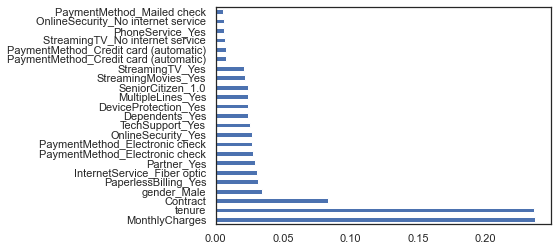

In [94]:
#get importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

# Model Logistic Regression

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [96]:
model = LogisticRegression()

In [97]:
model.fit(X_train, y_train)

LogisticRegression()

In [98]:
y_pred= model.predict(X_test)

In [99]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
...,...,...
6366,0,0
315,0,0
2439,0,0
5002,0,0


# Evaluate Model

              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.58      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



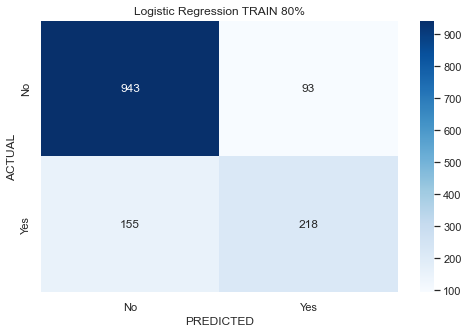

In [100]:
#Churn Yes = 1 No = 0

cm_model=confusion_matrix(y_test, y_pred)
labels = ['No','Yes'] #0, 1

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model,annot=True, fmt="0.0f",ax=ax, cmap="Blues")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

# is the model overvit or underfit ?

In [101]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [102]:
# acuracy train

In [103]:
#accuracy score of training data
print(accuracy_score(y_train, y_pred_train))

0.7997870074547391


In [104]:
# accuracy test

In [105]:
print(accuracy_score(y_test, y_pred_test))

0.8239886444286728


data is not overvit

# AUC ROC

In [106]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_proba_train = model.predict_proba(X_train)[:,1]
y_proba_test = model.predict_proba(X_test)[:,1]
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)

In [107]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

In [108]:
# True Positive
tp_train, tp_test = cm_train[1][1], cm_test[1][1]
# True Negative
tn_train, tn_test = cm_train[0][0], cm_test[0][0]
# False Positive
fp_train, fp_test = cm_train[1][0], cm_test[1][0]
# False Negative
fn_train, fn_test = cm_train[0][1], cm_test[0][1]

In [109]:
# Overall, how often is the classifier correct?
accuracy_train, accuracy_test = ((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)), (
            (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test))
# When it's actually yes, how often does it predict yes?
recall_train, recall_test = (tp_train / (tp_train + fp_train)), (tp_test / (tp_test + fp_test))
# When it's actually no, how often does it predict no?
specificity_train, specificity_test = (tn_train / (tn_train + fn_train)), (tn_test / (tn_test + fn_test))
# When it predicts yes, how often is it correct?
precision_train, precision_test = (tp_train / (tp_train + fn_train)), (tp_test / (tp_test + fn_test))
# F1 Score
f1_score_train, f1_score_test = (2 * (precision_train * recall_train) / (precision_train + recall_train)), (
            2 * (precision_test * recall_test) / (precision_test + recall_test))

In [110]:
# Print all the evaluation metrics
print('\nTrain Confusion Matrix')
print(cm_train)
print('Test Confusion Matrix')
print(cm_test)
print('\nArea Under Curve')
print('AUC train & test        : %.2f%%' % (roc_auc_train * 100), '&', '%.2f%%' % (roc_auc_test * 100))
print('\nConfusion Matrix Evaluation')
print('Accuracy train & test   : %.2f%%' % (accuracy_train * 100), '&', '%.2f%%' % (accuracy_test * 100))
print('Recall train & test     : %.2f%%' % (recall_train * 100), '&', '%.2f%%' % (recall_test * 100))
print('Specificity train & test: %.2f%%' % (specificity_train * 100), '&', '%.2f%%' % (specificity_test * 100))
print('Precision train & test  : %.2f%%' % (precision_train * 100), '&', '%.2f%%' % (precision_test * 100))
print('F1 Score train & test   : %.2f%%' % (f1_score_train * 100), '&', '%.2f%%' % (f1_score_test * 100))
print('Log Loss train & test   :', round(log_loss(y_train, y_pred_train), 4), '&',
          round(log_loss(y_test, y_pred_test), 4))


Train Confusion Matrix
[[3728  410]
 [ 718  778]]
Test Confusion Matrix
[[943  93]
 [155 218]]

Area Under Curve
AUC train & test        : 83.86% & 86.06%

Confusion Matrix Evaluation
Accuracy train & test   : 79.98% & 82.40%
Recall train & test     : 52.01% & 58.45%
Specificity train & test: 90.09% & 91.02%
Precision train & test  : 65.49% & 70.10%
F1 Score train & test   : 57.97% & 63.74%
Log Loss train & test   : 6.9152 & 6.0793


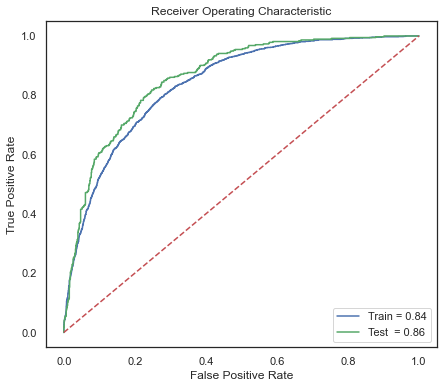

In [111]:
#create plot of ROC_AUC
plt.figure(figsize=(7, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label='Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label='Test  = %0.2f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Building a Moodel With Cross Validation

In [112]:
new_model = LogisticRegression()

In [113]:
score = cross_val_score(new_model, X_train, y_train, scoring="accuracy", cv = 3)

In [114]:
score

array([0.79446219, 0.79659212, 0.79818956])

# Hyper parameter

* model with best param

In [115]:
new_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [116]:
parameters = {"penalty": ['l1', 'l2', 'elasticnet', 'none'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "n_jobs": [None, -1],
              "max_iter": [10, 100, 1000]
             }

In [117]:
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3)

In [118]:
best_model = grid.fit(X_train, y_train)

* get best param

In [119]:
best_model.best_params_

{'max_iter': 100, 'n_jobs': None, 'penalty': 'none', 'solver': 'lbfgs'}

# Evaluate Model

* building a model with hyper tuning

In [120]:
model_new = LogisticRegression(max_iter = 100, n_jobs = None, penalty = 'none', solver = 'lbfgs') # tanya penalty

In [121]:
model_new.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [122]:
y_pred_new = model_new.predict(X_test)

              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.58      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



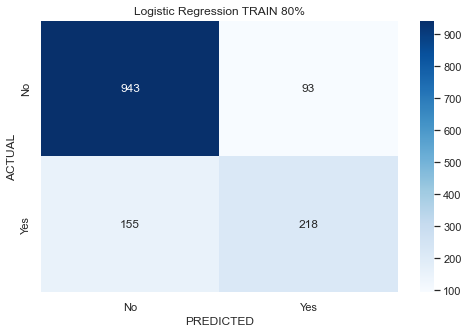

In [123]:
#Churn Yes = 1 No = 0

cm_model=confusion_matrix(y_test, y_pred)
labels = ['No','Yes'] #0, 1

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model,annot=True, fmt="0.0f",ax=ax, cmap="Blues")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



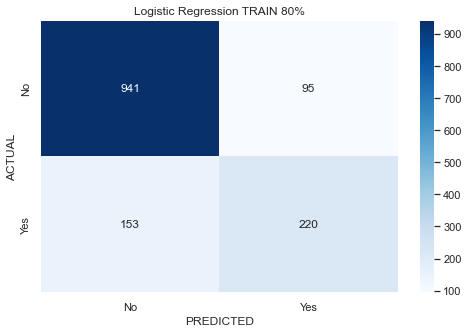

In [124]:
#Churn Yes = 1 No = 0

cm_model=confusion_matrix(y_test, y_pred_new)
labels = ['No','Yes'] #0, 1

print(classification_report(y_test, y_pred_new, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model,annot=True, fmt="0.0f",ax=ax, cmap="Blues")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [125]:
print(accuracy_score(y_test, y_pred))

0.8239886444286728


In [126]:
print(accuracy_score(y_test, y_pred_new))

0.8239886444286728


# Oversampling with SMOTE

In [127]:
# Oversampling with SMOTE
X_train_sm, y_train_sm = SMOTE(random_state = False).fit_resample(X_train, y_train)

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

In [ ]:
# model oversampled

model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

In [ ]:
# Predict using Logistic regression oversample

y_pred_sm = model_sm.predict(X_test)

In [ ]:
#Churn Yes = 1 No = 0

cm_model=confusion_matrix(y_test, y_pred_sm)
labels = ['No','Yes'] #0, 1

print(classification_report(y_test, y_pred_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model,annot=True, fmt="0.0f",ax=ax, cmap="Blues")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

# Is the model overfit or underfit?

In [ ]:
y_pred_train_sm = model_sm.predict(X_train_sm)
y_pred_test_sm = model_sm.predict(X_test)

In [ ]:
#accuracy score of training data
print(accuracy_score(y_train_sm, y_pred_train_sm))

In [ ]:
#accuracy score of testing data
print(accuracy_score(y_test, y_pred_test_sm))

## Result

**How Many Customer Churn?**

From a total of 7043 customers :
* 73.46% No churn
* 26.54% Churn

**How Many Customer Female and Male?** :

Not Churn = dari total 5174, female sebanyak 42%, male sebanyak 43%, unknown 14%

Churn = dari total 1869 customer churn, female sebanyak 43%, male sebanyak 42%, Unknown 13%


**How many customer Churn, who has a partner, has dependent or not, and old age or not**?
* **Partners**:

Out of a total of 1869 customer churn : 

customer has no partner sebanyak 55%, costomer who have a partner 30%, unknown 13%

* **Dependent**:

Out of a total of 1869 customers churn : 

customer has no dependents sebanyak 70%, customer have a dependent 15%, unknown 13%

* **Senior Citizen** :

Out of the total 1869 costumer churn : 

non-elderly customer sebanyak 64% | elderly customer sebanyak 21% | Unknown 13%

**How many customer Churn used service facilities**

* **Telephone Service**:

Out of a total of 1869 costumer churn : 

91% customer used Telephone Service, 9% not used Telephon Service

* **Multiple Lines**:

of a total of 1869, subscribed to Multiple Lines 39% | unsubscribed Multiple Lines 39% | do not have telephone service by 8% | customers whose data is unknown 14%

* **Internet service**:

of 1869 total, 22% DSL subscription | 59% Fiber Optic subscription | don't subscribe to internet service by 5% | unknown data 14%


* **OnlineBackup**

Of the 1869 customers whose Churn is Yes, as many as 57% of customers do not subscribe to Online Backup. Maybe they don't know the Online Backup feature. as much as 5.2% do not have an internet connection. A total of 23.7% subscribed and 13.4% unknown status.

* **Device Protection**

Of the 1869 customers whose Churn is Yes, as many as 55% of customers do not subscribe to Device Protection. Maybe you don't know the device protection feature. as much as 5.2% do not have an internet connection. A total of 24.9% subscribed and 13% unknown status.

* **TechSupport**

Of the 1869 customers whose Churn is Yes, as many as 66% of customers have not done Tech Support

* **StreamingTV**

not subscribed to tech support 43%, do not have internet service by 5.2%, subscribe to tech support 37.2, unknowns of 13.9%

* **StreamingMovies**

percentage not subscribed to tech support 43.4%, do not have internet service by 5.2%, subscribe to tech support 37.2%, unknowns of 13.96%

* **Papperless Billing**

of a total of 1869, billing without receipts 25%, with 74% receipt

## Action / Recommendation

**Suggestions for facilities** :

* recommendations for FiberOptic,

the cost is reduced, many customers we find it difficult to continue the payment service rental fee

* recommendations for Online Security,

promote again about the importance of security when surfing the internet

* recommendations for OnlineBackup,

more promotion about OnlineBackup, because it is important if data is lost

* recommendations for Contracts,

Don't underestimate month-to-month customers. maybe the costs incurred by month-to-month customers are not as big as one year and two years, but from the demand side, month-to-month company users are the most. keep the quality so that customers stay